In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore')

In [26]:
data=pd.read_csv(r"C:\Users\Gandharvi\OneDrive\Documents\dataset\Student_Performance.csv")
data

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


In [27]:
data.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [28]:
data.dtypes

Hours Studied                         int64
Previous Scores                       int64
Extracurricular Activities           object
Sleep Hours                           int64
Sample Question Papers Practiced      int64
Performance Index                   float64
dtype: object

In [29]:
data.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [30]:
data.duplicated().sum()

np.int64(127)

In [31]:
df = pd.DataFrame(data)

In [34]:
df= df.drop_duplicates(keep = 'first')

In [35]:
df.duplicated().sum()

np.int64(0)

In [38]:
df.columns =df.columns.str.replace(" ", "_")
df

,Hours_Studied,Previous_Scores,Extracurricular_Activities,Sleep_Hours,Sample_Question_Papers_Practiced,Performance_Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


In [39]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

In [40]:
num_cols

Index(['Hours_Studied', 'Previous_Scores', 'Sleep_Hours',
       'Sample_Question_Papers_Practiced', 'Performance_Index'],
      dtype='object')

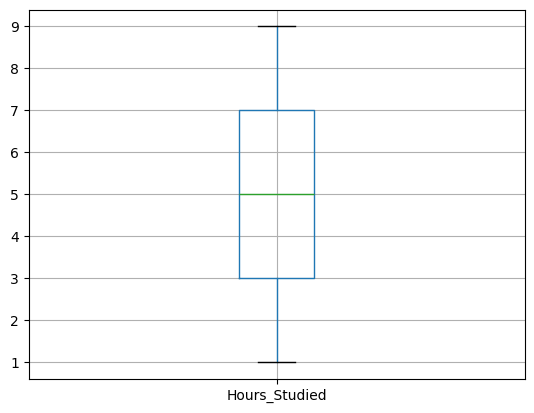

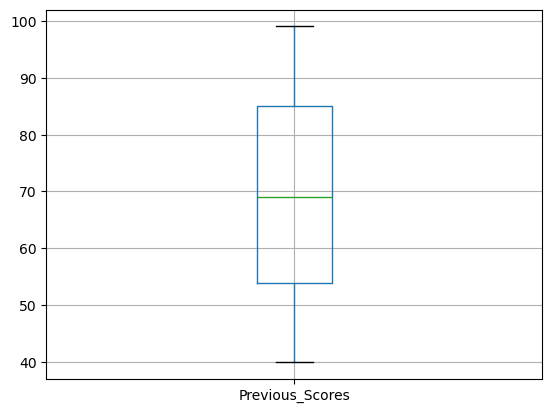

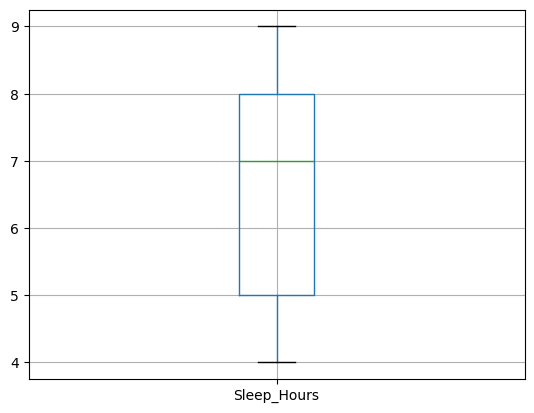

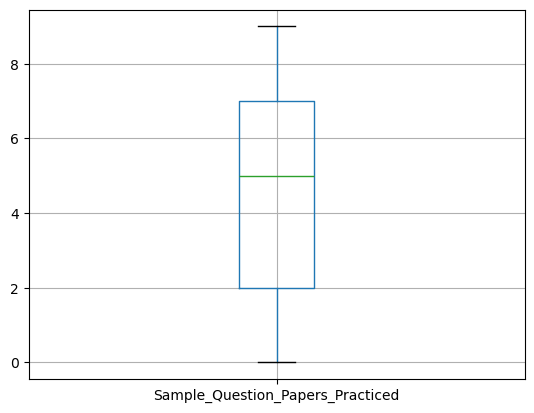

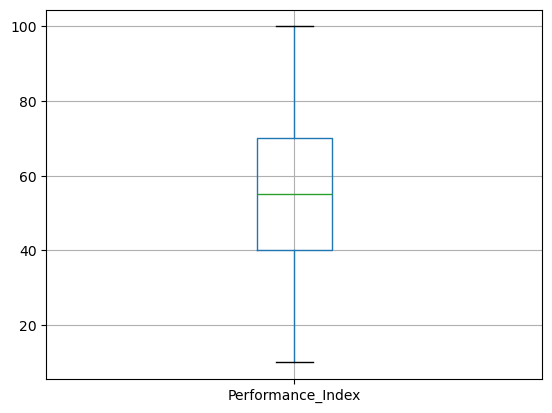

In [41]:
for i in num_cols:
    df.boxplot(column=i)
    plt.show()

In [42]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
df['Extracurricular_Activities']=le.fit_transform(df['Extracurricular_Activities'])

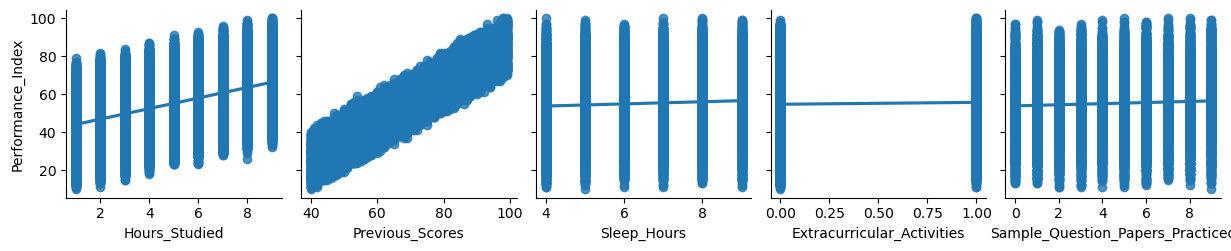

In [43]:
sns.pairplot(data=df,x_vars=['Hours_Studied', 'Previous_Scores', 'Sleep_Hours','Extracurricular_Activities',
       'Sample_Question_Papers_Practiced'],y_vars=['Performance_Index'],kind='reg')
plt.show()

In [45]:
x=df.loc[:,['Hours_Studied', 'Previous_Scores', 'Sleep_Hours','Extracurricular_Activities','Sample_Question_Papers_Practiced']]
y=df.loc[:,'Performance_Index']

In [46]:
x.shape

(9873, 5)

In [47]:
y.shape

(9873,)

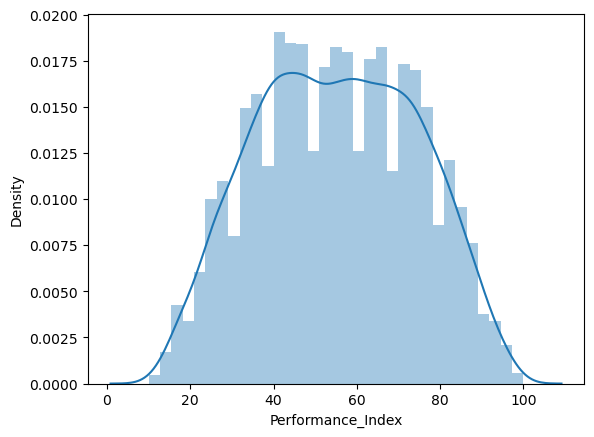

In [48]:
sns.distplot(y)
plt.show()

In [49]:
from scipy.stats import skew
skew(y)

np.float64(-0.0004117993842870783)

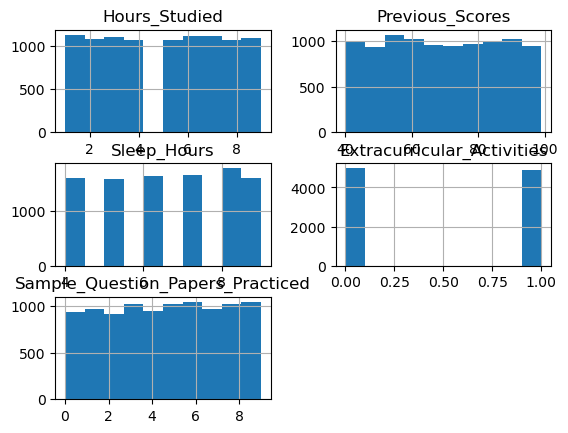

In [50]:
x.hist(bins=10)
plt.show()

In [52]:
data_num_skew = x.apply(lambda i: skew(i))
data_num_skew

Hours_Studied                      -0.003348
Previous_Scores                     0.005580
Sleep_Hours                        -0.041343
Extracurricular_Activities          0.020056
Sample_Question_Papers_Practiced   -0.034888
dtype: float64

                                  Hours_Studied  Previous_Scores  \
Hours_Studied                          1.000000        -0.010676   
Previous_Scores                       -0.010676         1.000000   
Extracurricular_Activities             0.004899         0.009534   
Sleep_Hours                            0.002131         0.007975   
Sample_Question_Papers_Practiced       0.015740         0.008719   
Performance_Index                      0.375332         0.915135   

                                  Extracurricular_Activities  Sleep_Hours  \
Hours_Studied                                       0.004899     0.002131   
Previous_Scores                                     0.009534     0.007975   
Extracurricular_Activities                          1.000000    -0.024008   
Sleep_Hours                                        -0.024008     1.000000   
Sample_Question_Papers_Practiced                    0.013839     0.004907   
Performance_Index                                   0.026075 

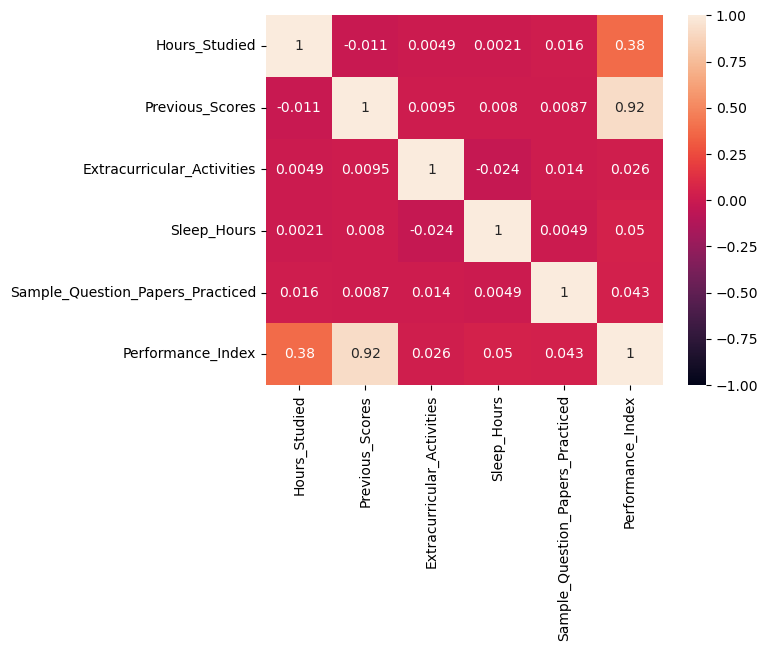

In [53]:
corr=df.corr(method='pearson')
print(corr)

sns.heatmap(corr,vmax=1.0,vmin=-1.0,annot=True)
plt.show()

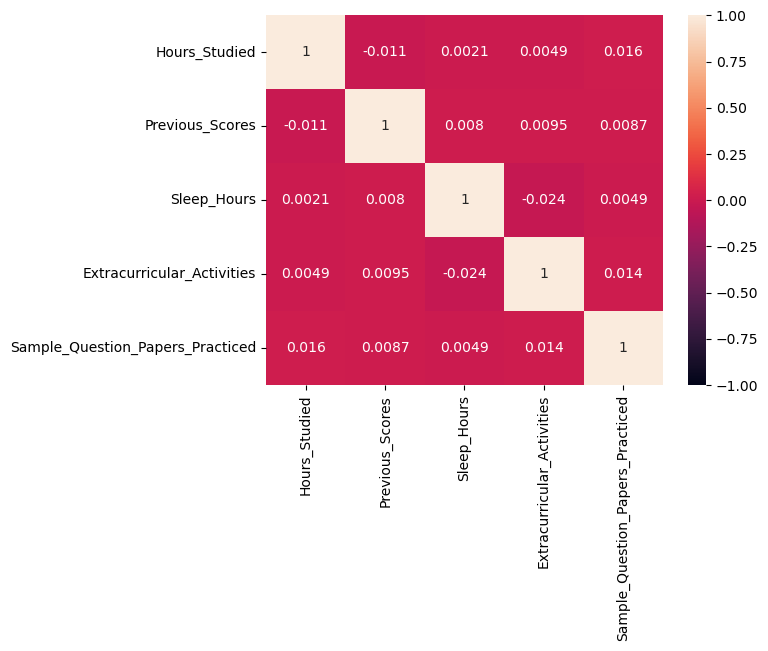

In [54]:
sns.heatmap(x.corr(method='pearson'),vmax=1.0,vmin=-1.0,annot=True)
plt.show()

In [55]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
vif_df=pd.DataFrame()
vif_df["features"]=x.columns
vif_df["VIF factor"]=[vif(x.values,i) for i in range (x.shape[1])]
vif_df

,features,VIF factor
0,Hours_Studied,4.265115
1,Previous_Scores,10.119579
2,Sleep_Hours,9.843302
3,Extracurricular_Activities,1.929446
4,Sample_Question_Papers_Practiced,3.350801


In [56]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=10)

In [57]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(6911, 5)
(2962, 5)
(6911,)
(2962,)


In [58]:
from sklearn.linear_model import LinearRegression

LR=LinearRegression()
LR.fit(x_train,y_train)

print(LR.intercept_)
print(LR.coef_)

-34.054446469523114
[2.85058045 1.01784297 0.4896133  0.61569821 0.18510228]


In [115]:
# Unseen Random value input
# x1=0
# x2=0
# x3=0
# x4=0
# x5=0
# y_pred=-34.17998671426317+2.84213817*x1+1.02073159*x2+0.47847675*x3+0.65921554*x4+0.19358817*x5
# y_pred


-34.17998671426317

In [59]:
y_test_pred=LR.predict(x_test)
y_test_pred

array([75.95435584, 55.88690861, 71.61691269, ..., 43.42264867,
       95.03378463, 84.11869797])

In [60]:
new_df=pd.DataFrame()
new_df=x_test.copy()

new_df["Actual"]=y_test
new_df["Predicted"]=y_test_pred
new_df=new_df.reset_index().drop("index",axis=1)
new_df

,Hours_Studied,Previous_Scores,Sleep_Hours,Extracurricular_Activities,Sample_Question_Papers_Practiced,Actual,Predicted
0,9,78,9,0,3,74.0,75.954356
1,9,59,6,0,7,50.0,55.886909
2,6,84,4,0,6,72.0,71.616913
3,9,43,4,0,4,40.0,38.066888
4,2,54,7,0,0,30.0,30.037528
...,...,...,...,...,...,...,...
2957,6,98,9,1,1,89.0,88.004968
2958,9,62,4,0,1,60.0,56.850597
2959,2,66,7,1,3,42.0,43.422649
2960,8,99,9,0,6,98.0,95.033785


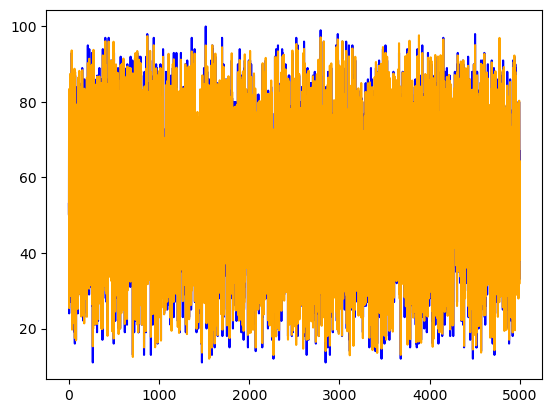

In [118]:
new_df["Actual"].plot(color="blue")
new_df["Predicted"].plot(color="orange")
plt.show()

In [61]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
import numpy as np
 
r2=r2_score(y_test,y_test_pred)
print("R-squared:",r2)
 
mse = mean_squared_error(y_test,y_test_pred)
print("MSE:",mse)
 
mae = mean_absolute_error(y_test,y_test_pred)
print("MAE:",mae)
 
rmse=np.sqrt(mean_squared_error(y_test,y_test_pred))
print("RMSE:",rmse)
 
adjusted_r_squared = 1 - (1-r2)*(len(y)-1)/(len(y)-x.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.9880644214378606
MSE: 4.329098106337806
MAE: 1.6456640280026216
RMSE: 2.0806484821655498
Adj R-square: 0.9880583732071105


In [62]:
new_df["Residual"]=new_df['Actual']-new_df['Predicted']
new_df.to_excel("new_data_house_price.xlsx",header=True,index=True)
new_df

,Hours_Studied,Previous_Scores,Sleep_Hours,Extracurricular_Activities,Sample_Question_Papers_Practiced,Actual,Predicted,Residual
0,9,78,9,0,3,74.0,75.954356,-1.954356
1,9,59,6,0,7,50.0,55.886909,-5.886909
2,6,84,4,0,6,72.0,71.616913,0.383087
3,9,43,4,0,4,40.0,38.066888,1.933112
4,2,54,7,0,0,30.0,30.037528,-0.037528
...,...,...,...,...,...,...,...,...
2957,6,98,9,1,1,89.0,88.004968,0.995032
2958,9,62,4,0,1,60.0,56.850597,3.149403
2959,2,66,7,1,3,42.0,43.422649,-1.422649
2960,8,99,9,0,6,98.0,95.033785,2.966215


In [64]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge = Ridge()
params = {'alpha': [0.01, 0.1, 1, 10, 100]}

ridge_cv = GridSearchCV(ridge, params, cv=5, scoring='r2')
ridge_cv.fit(x_train, y_train)

print("Best alpha:", ridge_cv.best_params_)

y_pred_ridge = ridge_cv.predict(x_test)


Best alpha: {'alpha': 1}


In [65]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
import numpy as np
 
r2=r2_score(y_test,y_pred_ridge)
print("R-squared:",r2)
 
mse = mean_squared_error(y_test,y_pred_ridge)
print("MSE:",mse)
 
mae = mean_absolute_error(y_test,y_pred_ridge)
print("MAE:",mae)
 
rmse=np.sqrt(mean_squared_error(y_test,y_pred_ridge))
print("RMSE:",rmse)
 
adjusted_r_squared = 1 - (1-r2)*(len(y)-1)/(len(y)-x.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.9880644101333598
MSE: 4.329102206540622
MAE: 1.6456698869754893
RMSE: 2.0806494674838003
Adj R-square: 0.9880583618968812
